<a href="https://colab.research.google.com/github/nafi-rahman/ML-AI/blob/main/Exercises_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercises

##Create a straght line dataset with the formula
`Linear Regression y, mx + c`

###import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


###creating the x and y with the formula

In [2]:
weight = 0.3
bias = 0.9
x = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = weight * x + bias

len(x),len(y)

(100, 100)

###splitting data

In [3]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split] , y[:train_split]
x_test,y_test = x[train_split:] , y[train_split:]

len(x_test),len(y_test),len(x_train),len(y_train)

(20, 20, 80, 80)

###plotting data

In [4]:
def data_plot(train_data=None,
              train_label=None,
              test_data=None,
              test_label=None,
              prediction=None):
  plt.figure(figsize=(8,5))

  #plt training data in blue
  if train_data is not None:
    if train_label is not None:
      plt.scatter(train_data,
                train_label,
                c='b',
                label="Training data")
  #plt testing data in green
  if test_data is not None:
    if test_label is not None:
      plt.scatter(test_data,
                test_label,
                c='g',
                label="Testing data")
  #plt predictions in red
  if prediction is not None:
    plt.scatter(test_data,
                prediction,
                c='r',
                label="Predictions")
  #show legends
  plt.legend(prop={"size":14})


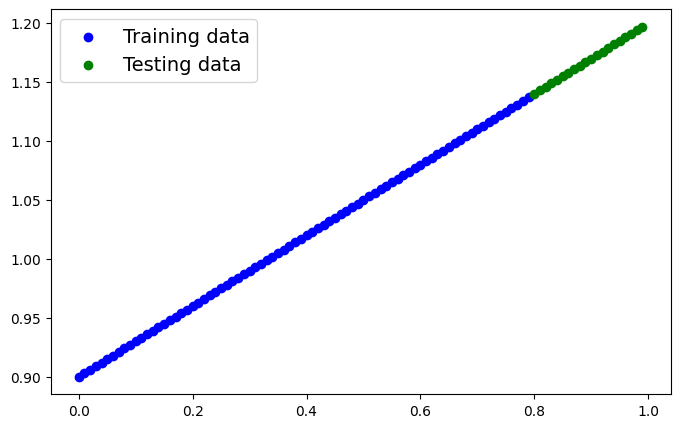

In [5]:
data_plot(x_train,y_train,x_test,y_test)

##Building a PyTorch model

In [6]:
from torch import nn
class Lin(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias

In [7]:
from torch import nn
class LinReg(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.Linear() for creating model params
    self.linear_layer = nn.Linear(in_features=1,
                                   out_features=1)
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [8]:
model = LinReg()

###Loss function and optimizer

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(params = model.parameters(),lr=0.01)

##Training and testing loop

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"

def modelTT(epoch,model,train_data,train_label,test_data,test_label):
  EPOCHS = epoch
  if device == "cuda":
    model.to(device)
    train_data.to(device)
    train_label.to(device)
    test_data.to(device)
    test_label.to(device)
  #Train
  for epoch in range(EPOCHS):
    model.train()
    y_pred = model(train_data) #1. Forward pass
    loss = loss_fn(y_pred,train_label) #2. calculate loss
    optimizer.zero_grad() #3. zeroing the optimizer
    loss.backward() #4. back propegation
    optimizer.step() #5.optimizing the values
  #test
  model.eval()
  with torch.inference_mode():
    test_pred = model(test_data)
    test_loss = loss_fn(test_pred,test_label)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

##Training/testing/evaluating model

###training and testing model using the train/test loop

In [18]:
print(f"model params before training and testing loop: \n{model.state_dict()}")

model params before training and testing loop: 
OrderedDict([('linear_layer.weight', tensor([[0.2967]])), ('linear_layer.bias', tensor([0.8991]))])


In [19]:
modelTT(100,model,x_train,y_train,x_test,y_test)

In [20]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2989]])),
             ('linear_layer.bias', tensor([0.9013]))])

In [21]:
model.eval()
with torch.inference_mode():
  prediction = model(x_test)

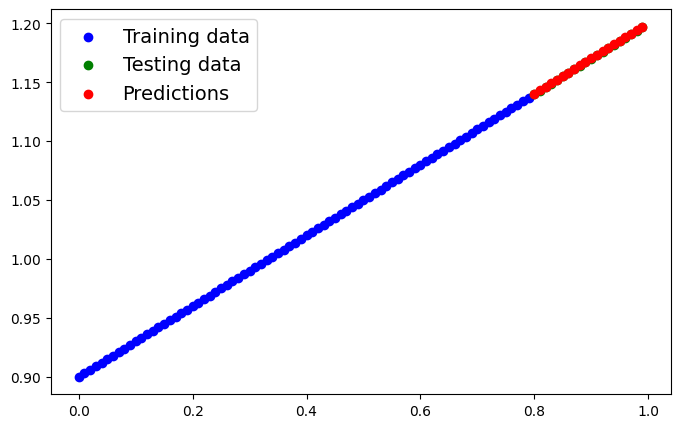

In [22]:
data_plot(x_train,y_train,x_test,y_test,prediction)

In [23]:
#save model
from pathlib import Path

#directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
#path
MODEL_NAME = "01_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#save state dict
print(f"saving model to : {MODEL_SAVE_PATH}")
torch.save(obj = model.state_dict(),
            f=MODEL_SAVE_PATH)

saving model to : models/01_model.pth


In [26]:
#laod the model
loaded_model = LinReg()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model.to(device)

LinReg(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [27]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2989]])),
             ('linear_layer.bias', tensor([0.9013]))])